In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv(r'E:\Data Science 143\RFM Analysis\customer_analysis_data.csv')
df

,CustomerID,Date,Amount
0,1,01-01-2022,100
1,1,15-02-2022,50
2,1,10-03-2022,75
3,2,05-01-2022,200
4,2,20-03-2022,150
5,3,01-02-2022,50
6,3,15-02-2022,100
7,3,10-03-2022,200
8,4,15-01-2022,75
9,4,05-03-2022,100


In [34]:
df['Date'] = pd.to_datetime(df['Date'])


In [35]:

recency = df.groupby('CustomerID')['Date'].max()
recency = (pd.to_datetime('now') - recency).dt.days
frequency = df.groupby('CustomerID')['Date'].count()
monetary_value = df.groupby('CustomerID')['Amount'].sum()


In [36]:

rfm = pd.concat([recency, frequency, monetary_value], axis=1)
rfm.columns = ['Recency', 'Frequency', 'MonetaryValue']


In [37]:

# Normalize the data
rfm_norm = StandardScaler().fit_transform(rfm)


In [42]:

sse = []
max_clusters = len(rfm.index.unique())
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_norm)
    sse.append(kmeans.inertia_)


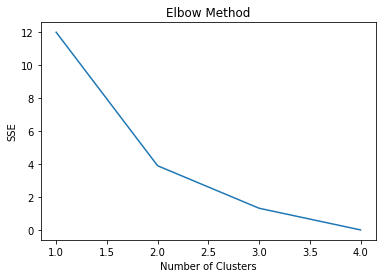

In [43]:
plt.plot(range(1, max_clusters+1), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

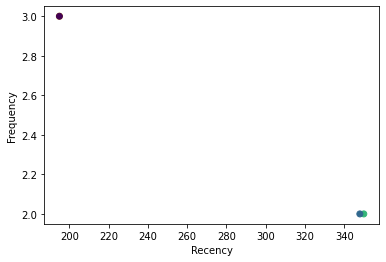

In [44]:

plt.scatter(rfm['Recency'], rfm['Frequency'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()